# **🌟 Titanic Dataset Analysis: EDA, Feature Engineering, ML Models, and Neural Networks for Survival Prediction 🌟**

---


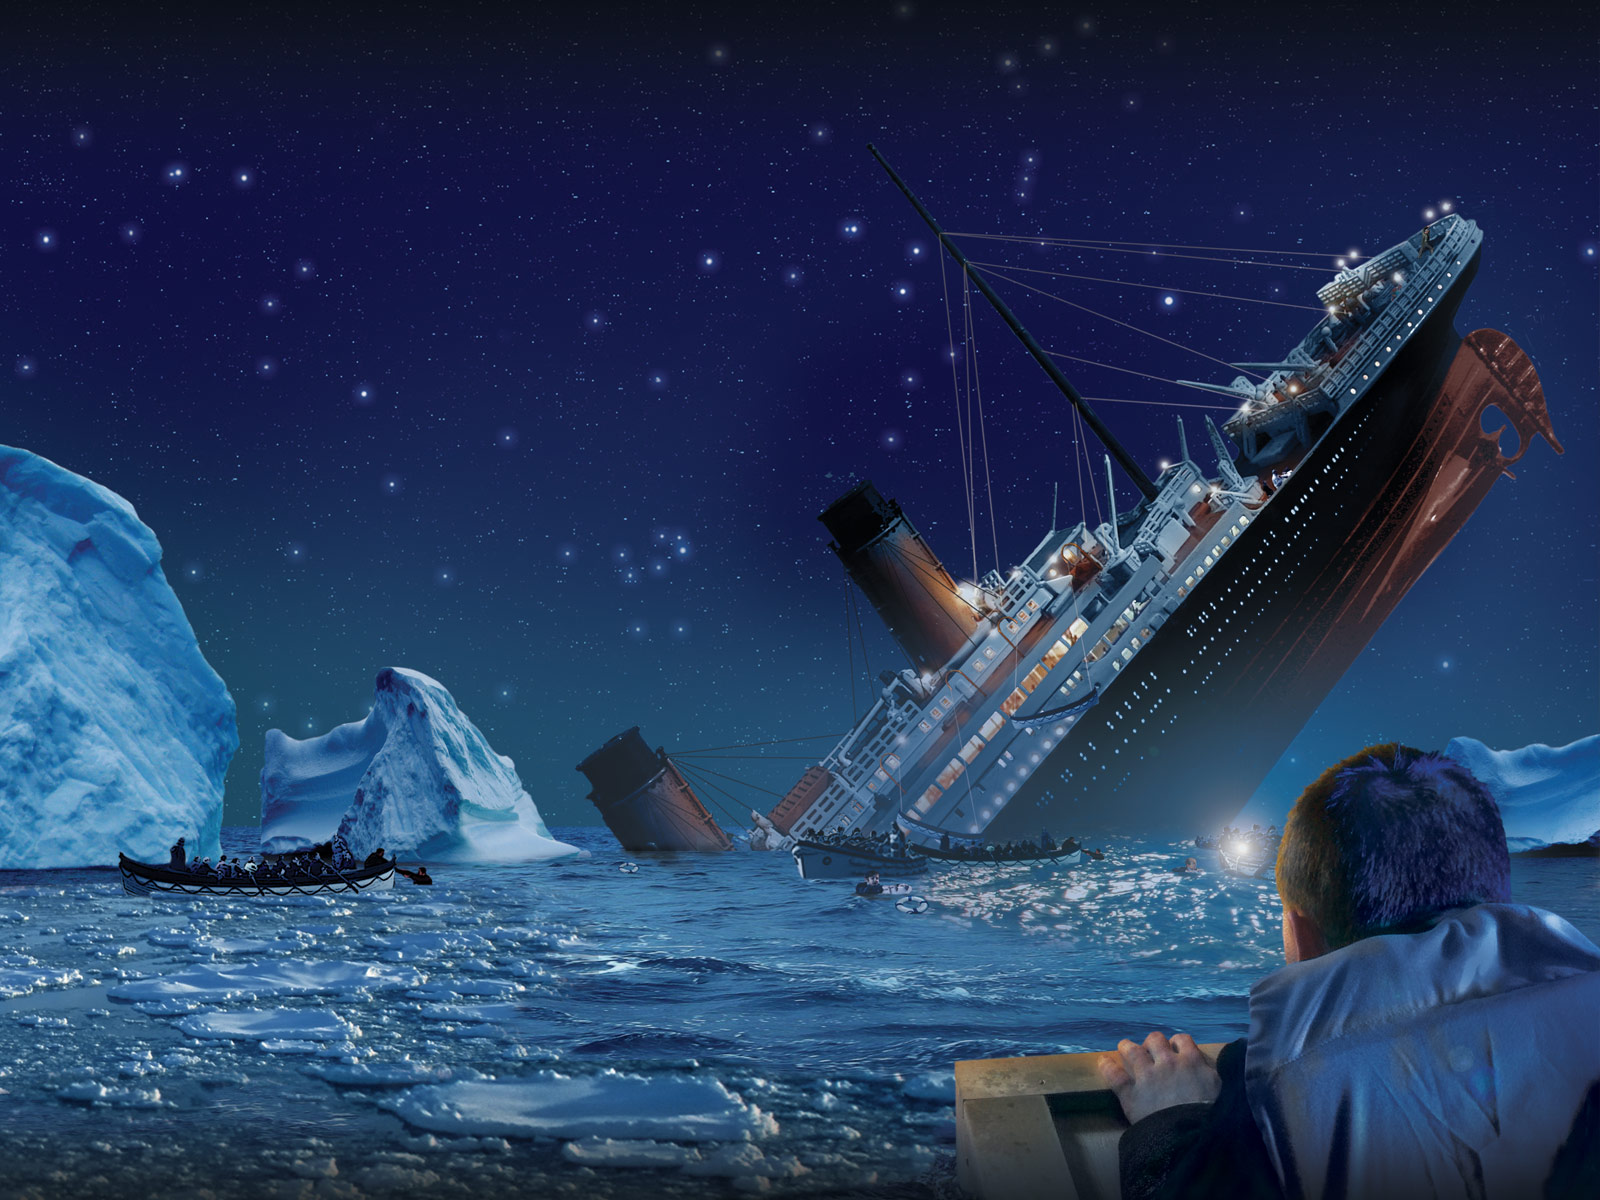

# **📌 Introduction**

<div style="background-color: #e6f7ff; color : green; border-left: 6px solid #0073e6; padding: 10px;">
Welcome to my comprehensive analysis of the Titanic dataset! 🚢

In this notebook, we will:
<ul>
    <li><b>Conduct Exploratory Data Analysis (EDA)</b></li>
    <li><b>Handle missing values</b></li>
    <li><b>Perform Feature Engineering</b></li>
    <li><b>Apply a variety of Machine Learning models including Neural Networks</b></li>
    <li><b>Conduct Hyperparameter Tuning</b></li>
    <li><b>Evaluate and compare model performance</b></li>
</ul>

Let's dive into the data and uncover insights that could help predict the survival of passengers.
</div>

---

# IMPORTS AND DATA LOADING

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from catboost import CatBoostClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.optimizers import Adam

In [11]:
import warnings
warnings.filterwarnings("ignore")

In [12]:
train = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')

# BASIC INFORMATION ABOUT THE DATA

In [13]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [15]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [17]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [18]:
print("TRAIN\n")
for cols in train.columns:
    print(f"Number of unique values in the column {cols} = {train[cols].nunique()}")
# print("\nTEST\n")
# for cols in test.columns:
#     print(f"Number of unique values in the column {cols} = {test[cols].nunique()}")

TRAIN

Number of unique values in the column PassengerId = 891
Number of unique values in the column Survived = 2
Number of unique values in the column Pclass = 3
Number of unique values in the column Name = 891
Number of unique values in the column Sex = 2
Number of unique values in the column Age = 88
Number of unique values in the column SibSp = 7
Number of unique values in the column Parch = 7
Number of unique values in the column Ticket = 681
Number of unique values in the column Fare = 248
Number of unique values in the column Cabin = 147
Number of unique values in the column Embarked = 3


In [19]:
categorical_columns = ['Pclass','Sex','SibSp','Parch','Embarked']

In [20]:
print("TRAIN : CATEGORICAL DATA\n")
for cols in categorical_columns:
    print(f"Unique values in {cols} are = {train[cols].unique()}")

print(f"Unique values in Survived are = {train.Survived.unique()}")
# print("\nTEST\n")
# for cols in categorical_columns:
#     print(f"Unique values in {cols} are = {test[cols].unique()}")


TRAIN : CATEGORICAL DATA

Unique values in Pclass are = [3 1 2]
Unique values in Sex are = ['male' 'female']
Unique values in SibSp are = [1 0 3 4 2 5 8]
Unique values in Parch are = [0 1 2 5 3 4 6]
Unique values in Embarked are = ['S' 'C' 'Q' nan]
Unique values in Survived are = [0 1]


In [21]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Our DataSet Contains 8 columns
- **Survived:** Survival (0 = No, 1 = Yes)
- **Pclass:** Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
- **Sex:** Sex
- **Age:** Age in years
- **SibSp:** # of siblings / spouses aboard the Titanic
- **Parch:** # of parents / children aboard the Titanic
- **Fare:** Passenger fare
- **Embarked:** Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

Survived is the Target columns

---

# 🛠️ HANDLING MISSING VALUES


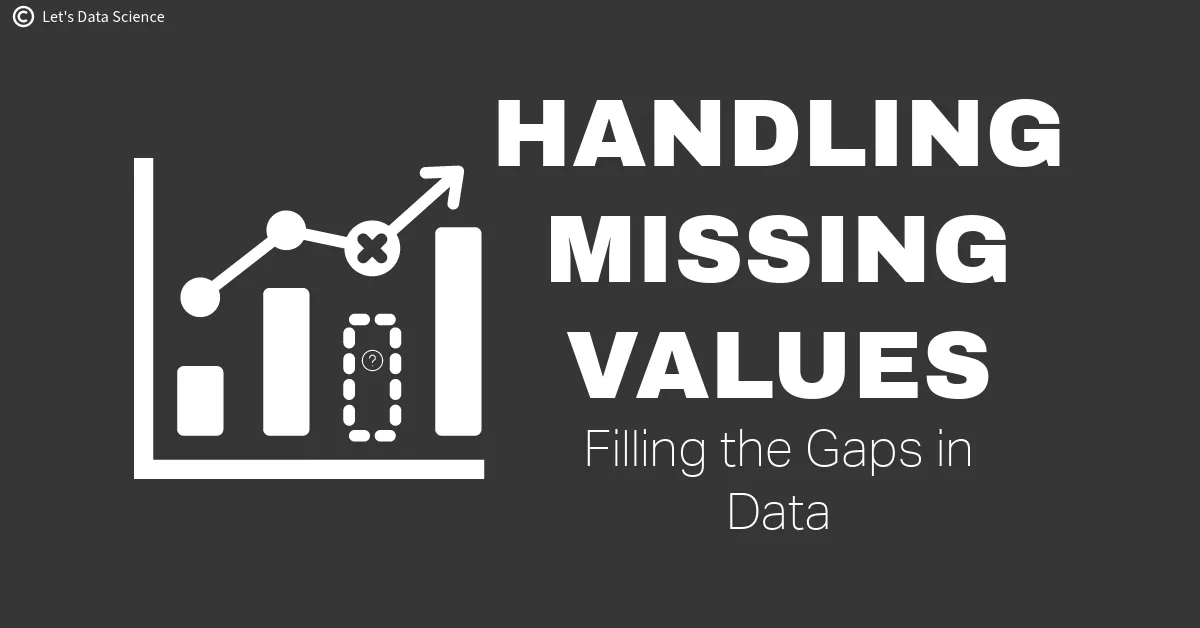
<br>
<br>
**Handling missing data is crucial for the accuracy of our models. We will employ various techniques to fill or remove missing values. There are few things to remember.**<br>
> **1. If the number of number of missing values in a column is very less as here you will se in column "*Embarked*". Replace this missing values with suitable measure of central values of the data.**<br>
> **2. If the number of missing values in a columns is too high almost of the order of the length of the dataset, as we have "*Cabin*" in our dataset. Drop the column.**<br>
> **3. If the number of missing values is neither too low nor too high as the "*Age*" column we need to find some other way. One way is to treat the column like a target and predict the missing values by ML modelling. There are other ways as well but mostly we predict them by our understanding of the data.**
---

In [22]:
print(f"Number of unique values in Sex Column = {train.Sex.nunique()} and values  = {train.Sex.unique()}")
print(f"Number of unique values in Embarked Column = {train.Embarked.nunique()} and values  = {train.Embarked.unique()}")

Number of unique values in Sex Column = 2 and values  = ['male' 'female']
Number of unique values in Embarked Column = 3 and values  = ['S' 'C' 'Q' nan]


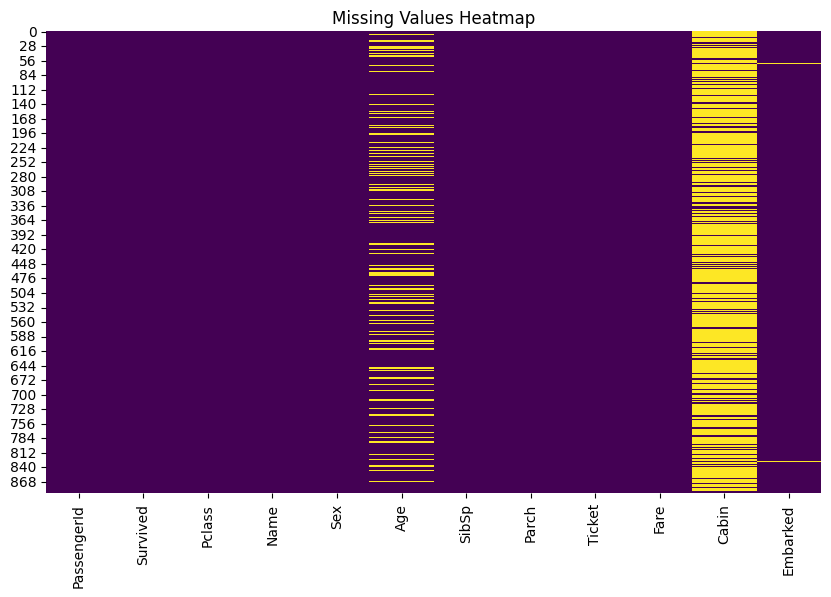

In [23]:
plt.figure(figsize=(10, 6))
sns.heatmap(train.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


**There are only 2 missing values in Embarked Columns we can replace the missing values by mode of the column.**

In [24]:
train['Embarked']=train.Embarked.fillna(train.Embarked.mode()[0])

In [25]:
train.Embarked.value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [26]:
train.Embarked.isnull().sum()

0

**ENCODING CATEGORICAL COLUMNS SEX AND EMBARKED**

In [27]:
train['Sex'] = train.Sex.map({'male': 1, 'female': 0})
train['Embarked'] = train.Embarked.map({'S':1,'C':2, 'Q':3})
test['Sex'] = test.Sex.map({'male': 1, 'female': 0})
test['Embarked'] = test.Embarked.map({'S':1,'C':2, 'Q':3, np.nan:0})

**DROP CABIN VALUE SINCE ITS MOSTY CONTAINS NAN VALUES**

In [28]:
train.drop('Cabin',axis=1,inplace=True)

In [29]:
test.drop('Cabin',axis=1,inplace=True)

In [30]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

> **Since Age is a continuos variable and does not contains as many null values as cabins, it cannot be ignored. We'll handle the missing values in Age later, once we analyse the data.**<br>
> **PassengerId and Ticket column do not contain any important information. So let's drop them.**

In [31]:
train.drop(["PassengerId",'Ticket'],axis=1,inplace=True)

In [32]:
test.drop('Ticket',axis=1,inplace=True)

In [33]:
train.dtypes

Survived      int64
Pclass        int64
Name         object
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int64
dtype: object

In [34]:
test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked         int64
dtype: object

# **📊 Exploratory Data Analysis (EDA)**

**In this section, we will explore the dataset to gain insights into the data distribution and relationships between features.**

## **PLOTS TO VISUALIZE DATA**

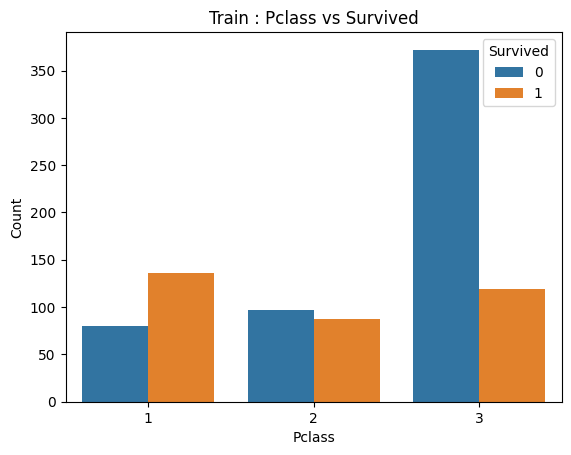

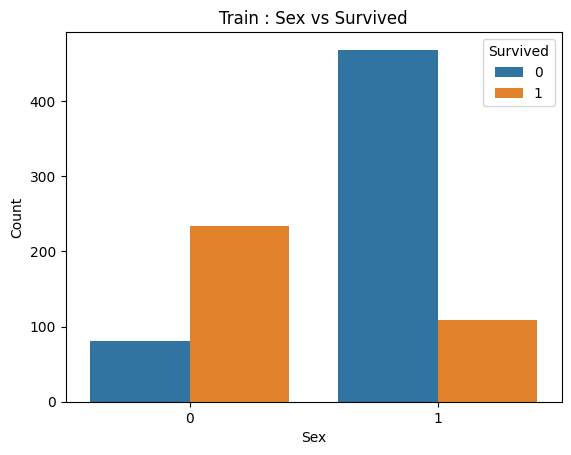

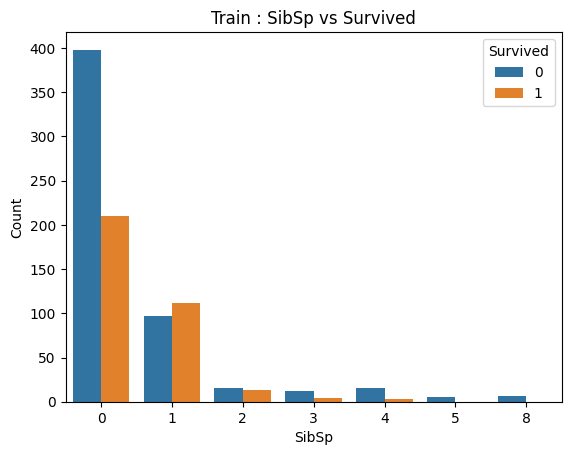

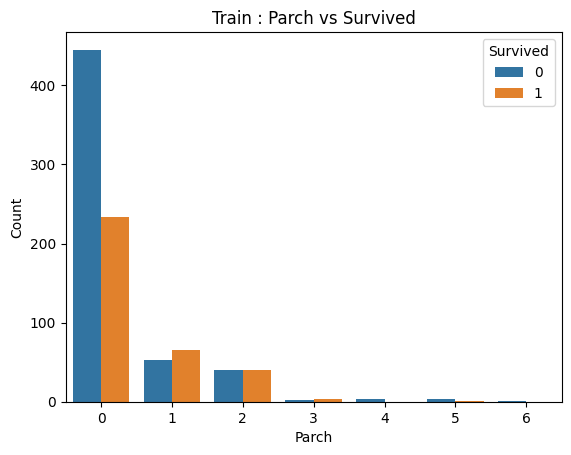

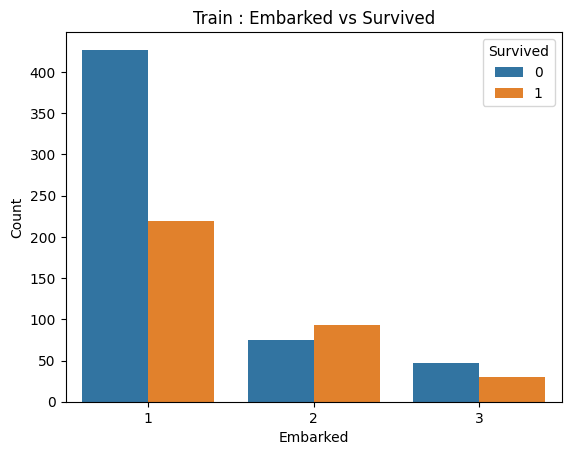

In [35]:
for cols in categorical_columns:
    sns.countplot(x=cols, hue='Survived', data=train)
    plt.title(f'Train : {cols} vs Survived')
    plt.xlabel(f'{cols}')
    plt.ylabel('Count')
    plt.show()

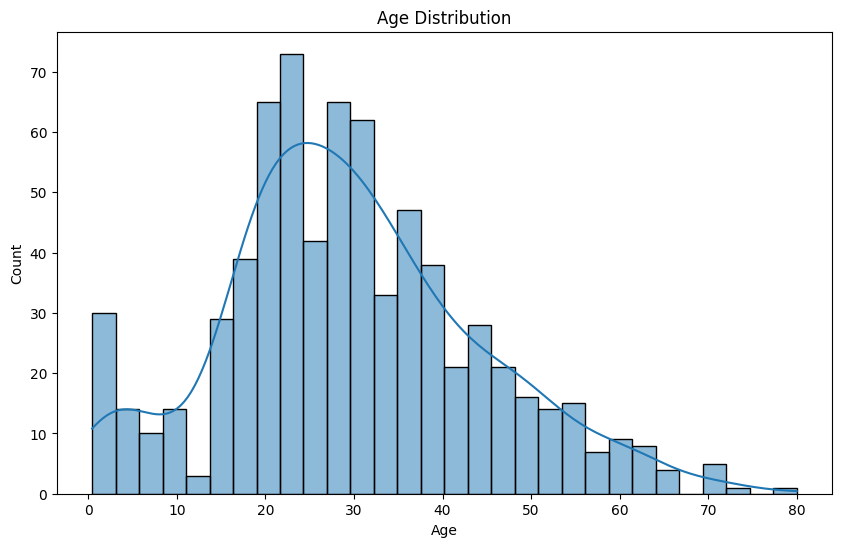

In [36]:
plt.figure(figsize=(10, 6))
sns.histplot(train['Age'].dropna(), bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

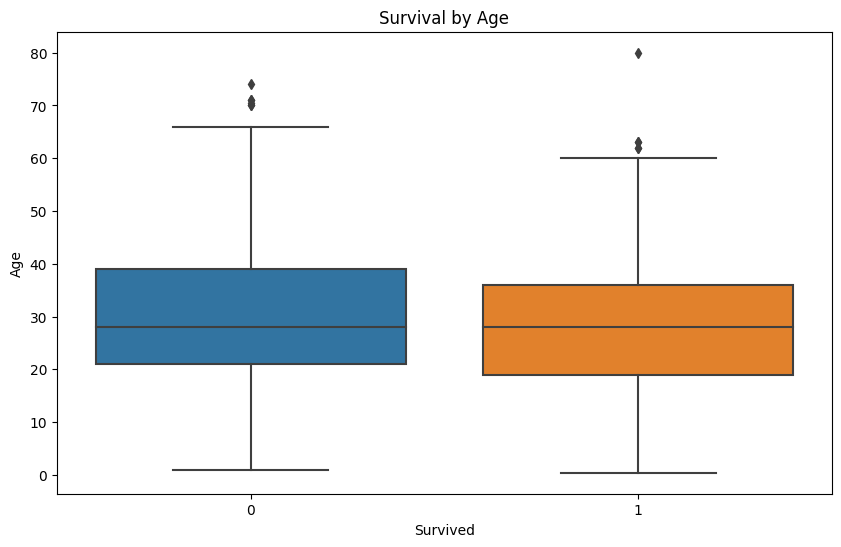

In [37]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Survived', y='Age', data=train)
plt.title('Survival by Age')
plt.show()

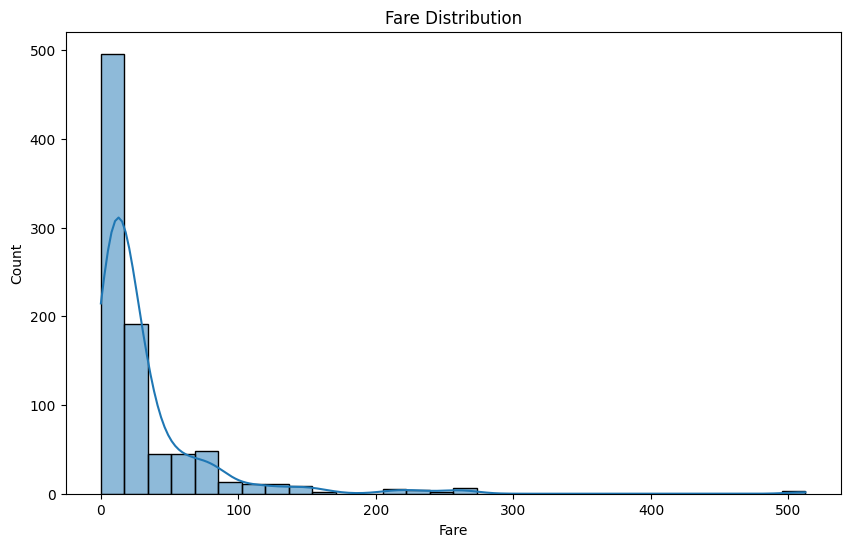

In [38]:
plt.figure(figsize=(10, 6))
sns.histplot(train['Fare'], bins=30, kde=True)
plt.title('Fare Distribution')
plt.show()

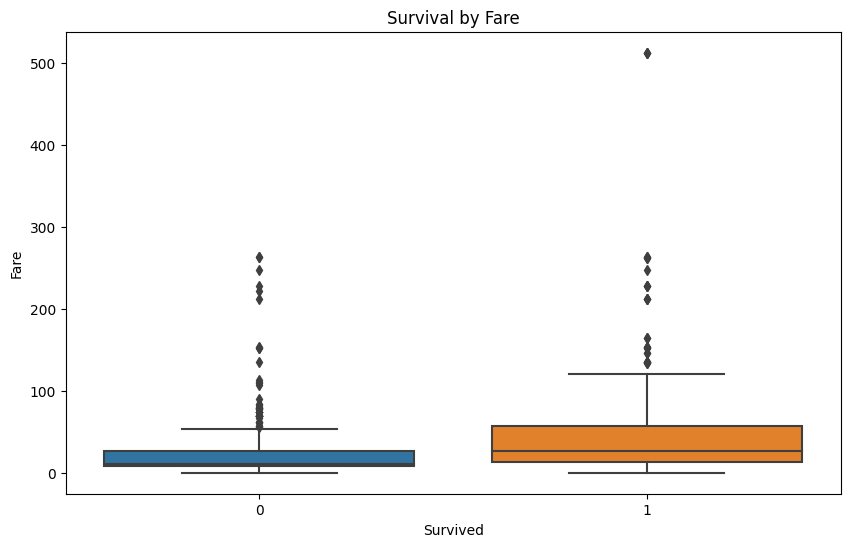

In [39]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Survived', y='Fare', data=train)
plt.title('Survival by Fare')
plt.show()

> **Let's have a look on the distribution of data in test data set and compare it with train dataset**

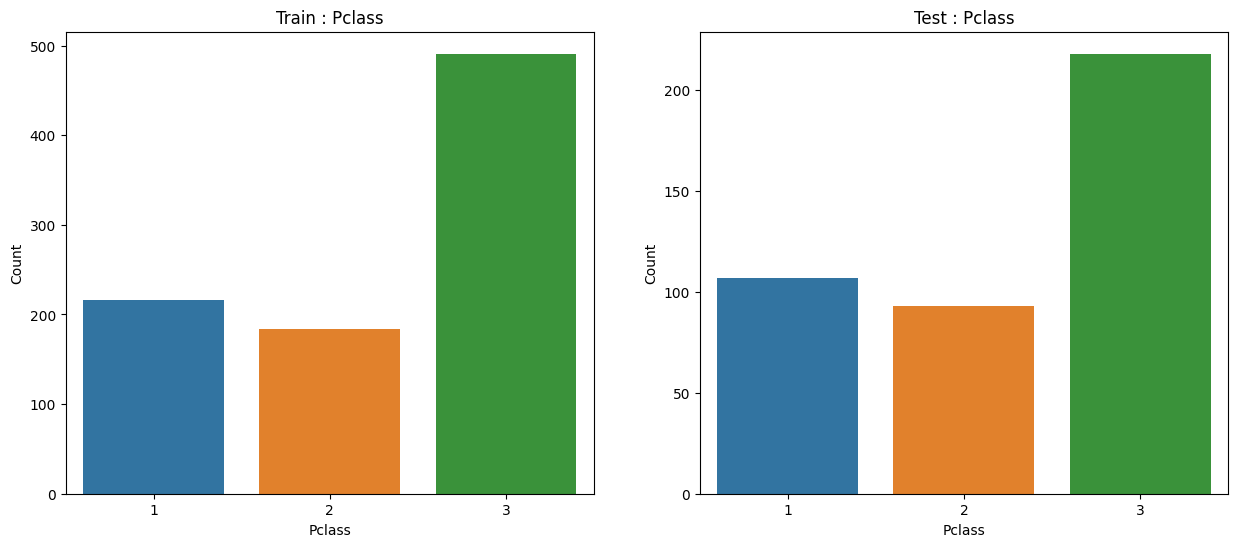

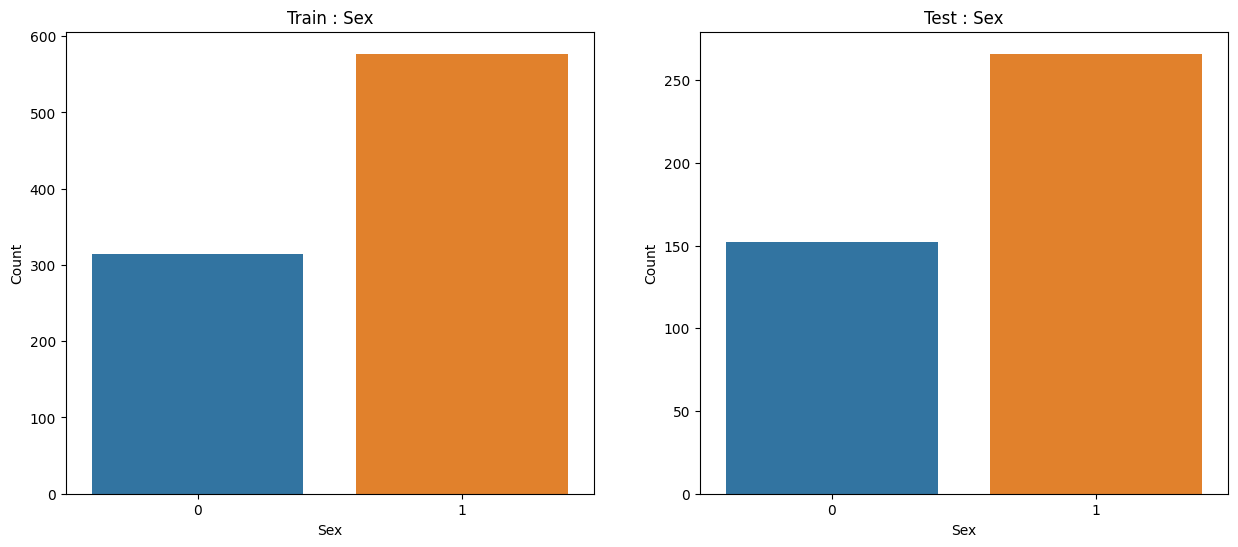

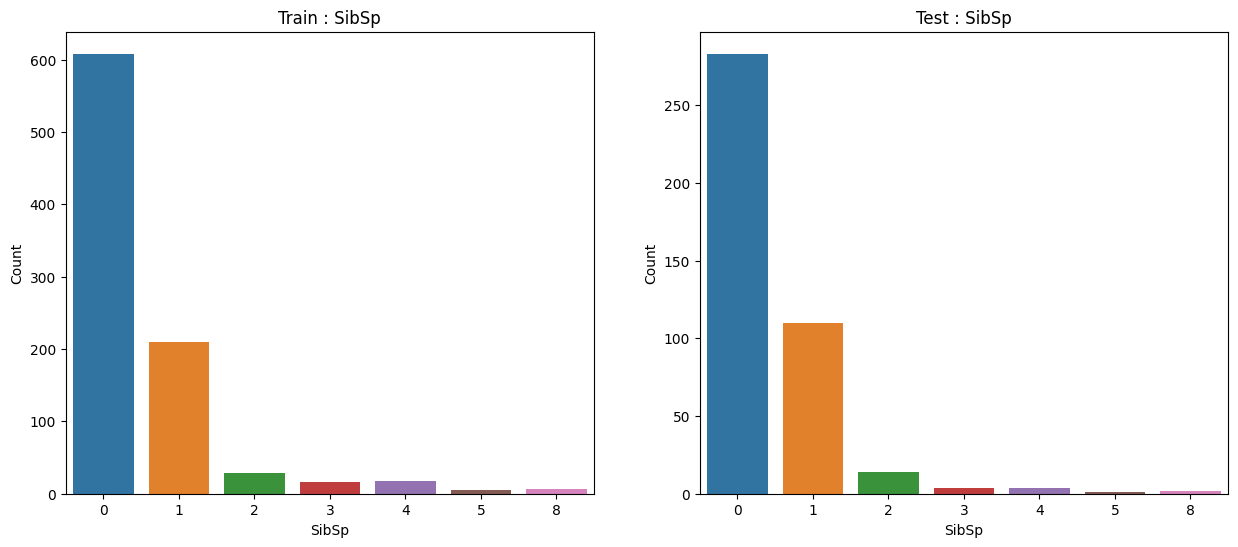

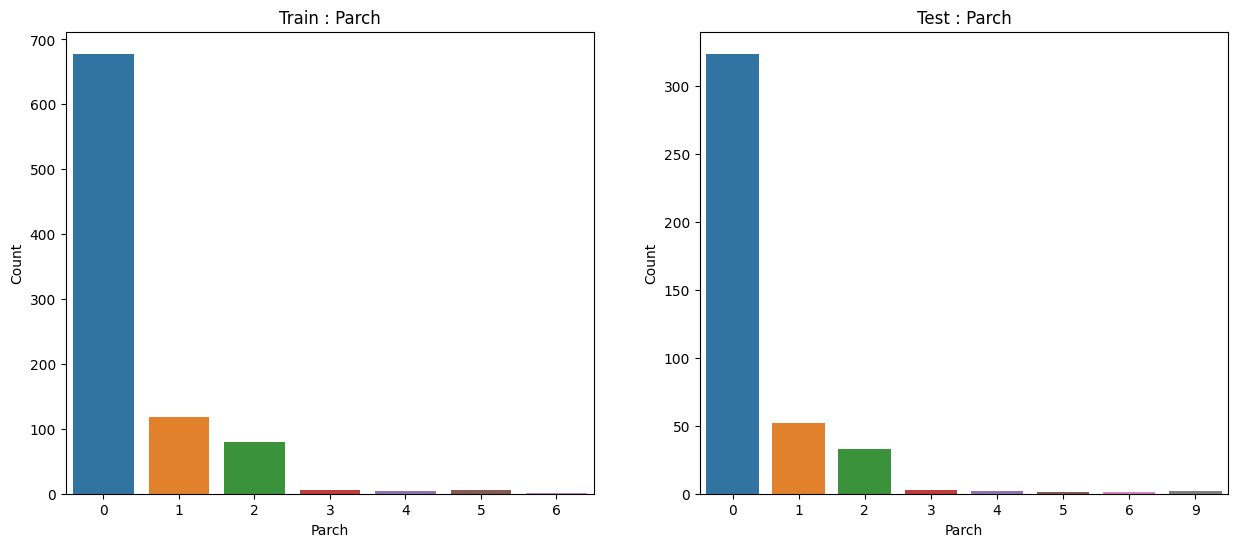

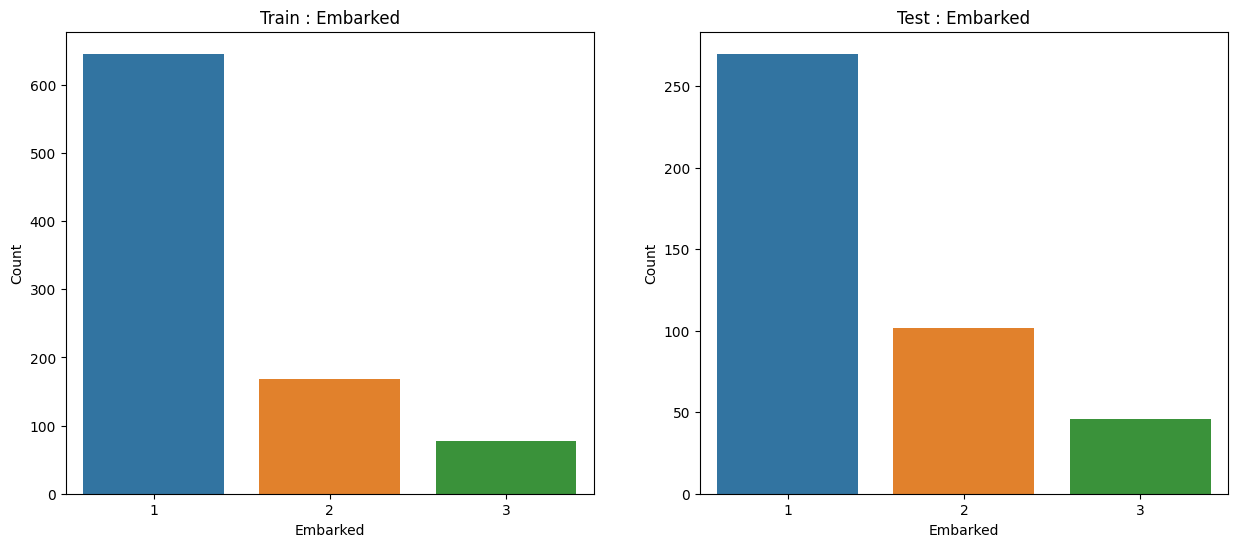

In [40]:
for cols in categorical_columns:
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    sns.countplot(x=cols,  data=train)
    plt.title(f'Train : {cols}')
    plt.xlabel(f'{cols}')
    plt.ylabel('Count')   
    
    plt.subplot(1,2,2)
    sns.countplot(x=cols,  data=test)
    plt.title(f'Test : {cols}')
    plt.xlabel(f'{cols}')
    plt.ylabel('Count')
    plt.show()

**DATA DISTRIBUTION IN TEST DATASET IN SAME AS IN TRAIN DATASET**

> **Let's have a look into the correlation between the features**

## **CORRELATION MATRIX**

In [41]:
df_for_corr = train.drop(['Name'],axis=1)
corr_mat = df_for_corr.corr()

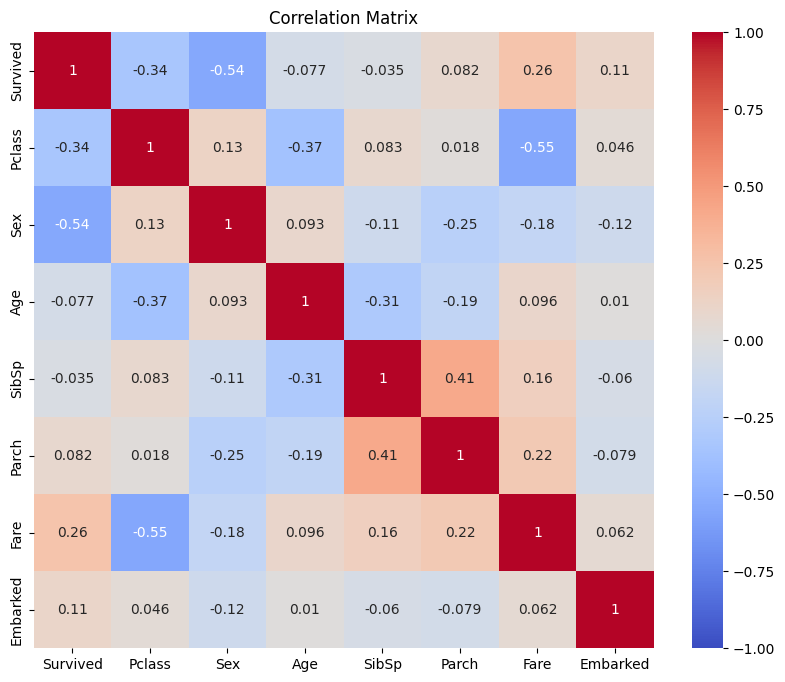

In [42]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

**RELATION WITH SURVIVED**

In [43]:
corr_mat.Survived.abs().sort_values(ascending=False)

Survived    1.000000
Sex         0.543351
Pclass      0.338481
Fare        0.257307
Embarked    0.106811
Parch       0.081629
Age         0.077221
SibSp       0.035322
Name: Survived, dtype: float64

**MINOR ANALYSIS**

In [44]:
SibSp8_train = train[(train.SibSp == 8) | (train.SibSp == 5)]
SibSp8_test = test[(test.SibSp == 8) | (test.SibSp == 5)]
Parch_4_6_train = train[(train.Parch == 4) | (train.Parch == 6)]
Parch_4_6_test = test[(test.Parch == 4) | (test.Parch == 6)]

In [45]:
SibSp8_train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
59,0,3,"Goodwin, Master. William Frederick",1,11.0,5,2,46.90,1
71,0,3,"Goodwin, Miss. Lillian Amy",0,16.0,5,2,46.90,1
159,0,3,"Sage, Master. Thomas Henry",1,NaN,8,2,69.55,1
180,0,3,"Sage, Miss. Constance Gladys",0,NaN,8,2,69.55,1
201,0,3,"Sage, Mr. Frederick",1,NaN,8,2,69.55,1
324,0,3,"Sage, Mr. George John Jr",1,NaN,8,2,69.55,1
386,0,3,"Goodwin, Master. Sidney Leonard",1,1.0,5,2,46.90,1
480,0,3,"Goodwin, Master. Harold Victor",1,9.0,5,2,46.90,1
683,0,3,"Goodwin, Mr. Charles Edward",1,14.0,5,2,46.90,1
792,0,3,"Sage, Miss. Stella Anna",0,NaN,8,2,69.55,1


In [46]:
SibSp8_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
140,1032,3,"Goodwin, Miss. Jessie Allis",0,10.0,5,2,46.90,1
188,1080,3,"Sage, Miss. Ada",0,NaN,8,2,69.55,1
360,1252,3,"Sage, Master. William Henry",1,14.5,8,2,69.55,1


In [47]:
Parch_4_6_train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
167,0,3,"Skoog, Mrs. William (Anna Bernhardina Karlsson)",0,45.0,1,4,27.900,1
360,0,3,"Skoog, Mr. Wilhelm",1,40.0,1,4,27.900,1
438,0,1,"Fortune, Mr. Mark",1,64.0,1,4,263.000,1
567,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,21.075,1
678,0,3,"Goodwin, Mrs. Frederick (Augusta Tyler)",0,43.0,1,6,46.900,1


In [48]:
Parch_4_6_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
69,961,1,"Fortune, Mrs. Mark (Mary McDougald)",0,60.0,1,4,263.0000,1
132,1024,3,"Lefebre, Mrs. Frank (Frances)",0,NaN,0,4,25.4667,1
139,1031,3,"Goodwin, Mr. Charles Frederick",1,40.0,1,6,46.9000,1


> We can clearly Observed that Passengers with Parch =4 or 6 never survided & passenger with SibSp =5 or 8 never survived.

# **🧩 Feature Engineering**

**Feature engineering involves creating new features or modifying existing ones to improve model performance.**
> **Since, the Age column has few missing values and we didn't handle it yet. Let's perform some feature engineering as on Age first and get rid of null values.**<br>
> **We can extract initials from the name for further analysis.**

### **1. Creating Age Groups**

<div style="border: 2px solid #28a745; padding: 10px; border-radius: 5px;">
📌 <b>Note:</b> Grouping ages into categories can help simplify the model.
</div>

### **2. Extracting Titles from Names**
<div style="border: 2px solid #28a745; padding: 10px; border-radius: 5px;">
📌 <b>Note:</b> Extracting titles from name can give us more insights on Age & Sex.
</div>

### **3. Total Family Size**
<div style="border: 2px solid #28a745; padding: 10px; border-radius: 5px;">
📌 <b>Note:</b> Total family size may determine whether the person Survived or not.
</div>

---

In [49]:
train['Initials'] = train['Name'].str.extract('([A-Za-z]+)\.', expand=False)
train.Initials.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [50]:
test['Initials'] = test['Name'].str.extract('([A-Za-z]+)\.', expand=False)
test.Initials.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

In [51]:
title_mapping = {
    'Mlle': 'Miss', 'Mme': 'Miss', 'Ms': 'Miss', 'Dr': 'Mr', 'Major': 'Mr', 'Lady': 'Mrs',
    'Countess': 'Mrs', 'Jonkheer': 'Other', 'Col': 'Other', 'Rev': 'Other', 'Capt': 'Mr',
    'Sir': 'Mr', 'Don': 'Mr'
}
train['Initials'] = train['Initials'].replace(title_mapping)

In [52]:
test_title_mapping = {
    'Ms': 'Miss', 'Dr': 'Mr', 'Col': 'Mr', 'Rev': 'Other', 'Dona': 'Other'
}
test['Initials'] = test['Initials'].replace(test_title_mapping)

In [53]:

train.Initials.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], dtype=object)

In [54]:
test.Initials.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], dtype=object)

In [55]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Initials
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,1,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,2,Mrs
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,1,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,1,Mrs
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,1,Mr


In [56]:
train.groupby('Initials')['Age'].mean()

Initials
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [57]:
test.groupby('Initials')['Age'].mean()

Initials
Master     7.406471
Miss      21.774844
Mr        32.306452
Mrs       38.903226
Other     36.666667
Name: Age, dtype: float64

In [58]:
age_fill_values = {
    'Mr': 33,
    'Mrs': 36,
    'Master': 5,
    'Miss': 22,
    'Other': 46
}

# Apply the imputation
train['Age'] = train.apply(lambda row: age_fill_values[row['Initials']] if pd.isnull(row['Age']) else row['Age'], axis=1)

In [59]:
test_age_fill_values = {
    'Mr': 33,
    'Mrs': 39,
    'Master': 7,
    'Miss': 22,
    'Other': 47
}

# Apply the imputation
test['Age'] = test.apply(lambda row: age_fill_values[row['Initials']] if pd.isnull(row['Age']) else row['Age'], axis=1)

In [60]:
train.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Initials    0
dtype: int64

In [61]:
print(train.Age.describe())
print("\nClearly, the passenger's age varies from 0.42 year to 80 years. We can divide the continuos age into 8 classes,\ntaking class interval of each class to be 10.")

count    891.000000
mean      29.841942
std       13.281525
min        0.420000
25%       22.000000
50%       30.000000
75%       36.000000
max       80.000000
Name: Age, dtype: float64

Clearly, the passenger's age varies from 0.42 year to 80 years. We can divide the continuos age into 8 classes,
taking class interval of each class to be 10.


In [62]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80,float('inf')]
labels = [1, 2, 3, 4, 5, 6, 7, 8,9]

# Create the Age_Group column using pd.cut, handling NaN separately
train['Age_Group'] = pd.cut(train['Age'], bins=bins, labels=labels, right=True, include_lowest=True)

# Convert the categorical data to integers, while keeping NaN values as they are
train['Age_Group'] = train['Age_Group'].astype('Int64')

In [63]:
test['Age_Group'] = pd.cut(test['Age'], bins=bins, labels=labels, right=True, include_lowest=True)

# Convert the categorical data to integers, while keeping NaN values as they are
test['Age_Group'] = test['Age_Group'].astype('Int64')

In [64]:
train.isnull().sum()

Survived     0
Pclass       0
Name         0
Sex          0
Age          0
SibSp        0
Parch        0
Fare         0
Embarked     0
Initials     0
Age_Group    0
dtype: int64

In [65]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           1
Embarked       0
Initials       0
Age_Group      0
dtype: int64

In [66]:
test['Fare'] = test.Fare.fillna(test.Fare.mean())

In [67]:
train["Total_family_size"] = train.SibSp + train.Parch

In [68]:
test["Total_family_size"] = train.SibSp + train.Parch

In [69]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Initials,Age_Group,Total_family_size
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,1,Mr,3,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,2,Mrs,4,1
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,1,Miss,3,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,1,Mrs,4,1
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,1,Mr,4,0


In [70]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Initials,Age_Group,Total_family_size
0,892,3,"Kelly, Mr. James",1,34.5,0,0,7.8292,3,Mr,4,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,7.0000,1,Mrs,5,1
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,9.6875,3,Mr,7,0
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,8.6625,1,Mr,3,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,12.2875,1,Mrs,3,0


In [71]:
train.Total_family_size.unique()

array([ 1,  0,  4,  2,  6,  5,  3,  7, 10])

In [72]:
test.Total_family_size.unique()

array([ 1,  0,  4,  2,  6,  5,  3,  7, 10])

In [73]:
train.Initials.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], dtype=object)

In [74]:
train['Initials'] = train.Initials.map({'Mr':1, 'Mrs':4, 'Miss':3, 'Master':2, 'Other':5})

In [75]:

test['Initials'] = test.Initials.map({'Mr':1, 'Mrs':4, 'Miss':3, 'Master':2, 'Other':5})

In [76]:

df = train.drop('Name',axis=1)

In [77]:
df_test = test.drop(['PassengerId','Name'],axis=1)

## **DATAFRAME READY FOR TESTING**

In [78]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Initials,Age_Group,Total_family_size
0,0,3,1,22.0,1,0,7.2500,1,1,3,1
1,1,1,0,38.0,1,0,71.2833,2,4,4,1
2,1,3,0,26.0,0,0,7.9250,1,3,3,0
3,1,1,0,35.0,1,0,53.1000,1,4,4,1
4,0,3,1,35.0,0,0,8.0500,1,1,4,0


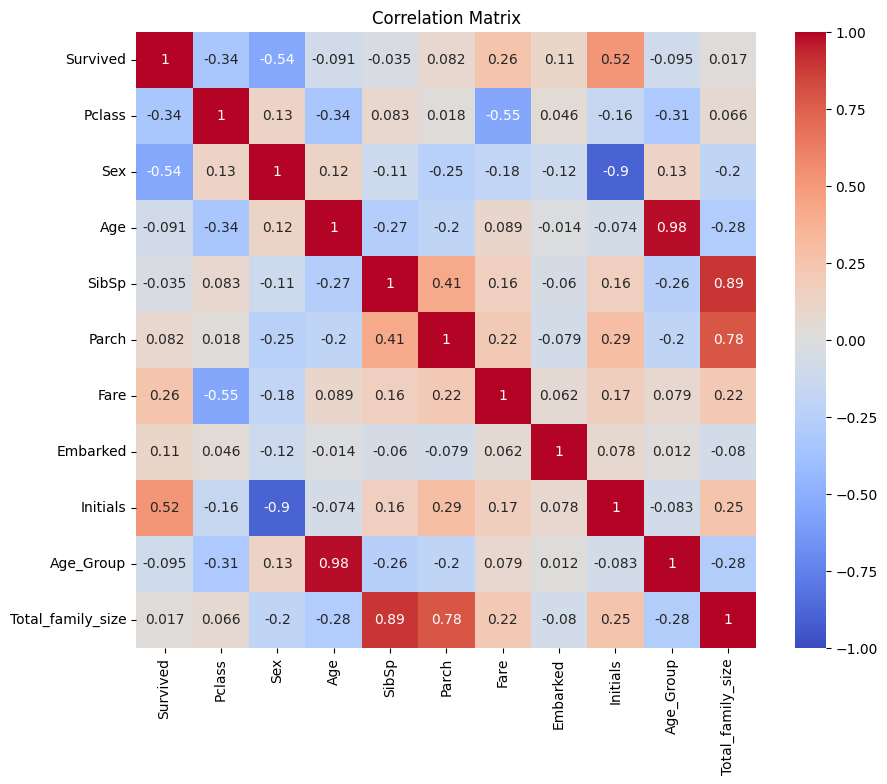

In [79]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

# TRAINING AND TESTING

In [80]:
X = df.drop('Survived',axis=1)
y = df.Survived

In [81]:
scaler = StandardScaler()
X[['Age', 'SibSp', 'Parch', 'Fare', 'Age_Group', 'Total_family_size']] = scaler.fit_transform(
    X[['Age', 'SibSp', 'Parch', 'Fare', 'Age_Group', 'Total_family_size']]
)

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **🤖 Modeling & Hyperparameter Tuning ⚙️**

**We will apply various machine learning models to predict passenger survival.
I have commented out the hyperparameter tuning part here just to reduce time taken to run whole notebook. Since, I have already saved the best models.**

## **Logistic Regression**

In [83]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
print(f'Logistic Regression Accuracy: {accuracy_score(y_test, lr_pred):.4f}')

Logistic Regression Accuracy: 0.7989


In [84]:
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': np.logspace(-4, 4, 20),
    'solver': ['lbfgs', 'liblinear', 'saga']
}

# Create the GridSearchCV object
grid_search_lr = GridSearchCV(estimator=LogisticRegression(max_iter=10000),
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=3,  # 5-fold cross-validation
                           verbose=0,  # Set to 0 for no verbosity
                           n_jobs=-1)  # Use all available cores

# Fit the grid search to the data
grid_search_lr.fit(X_train, y_train)

# Get the best parameters
best_params_lr = grid_search_lr.best_params_
print(f'Best Parameters: {best_params_lr}')

# Train the model with the best parameters
best_model_lr = grid_search_lr.best_estimator_

# Evaluate the model
y_pred_lr = best_model_lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_lr)
print(f'Logistic Regression Model Accuracy: {accuracy:.4f}')

Best Parameters: {'C': 0.615848211066026, 'penalty': 'l2', 'solver': 'saga'}
Logistic Regression Model Accuracy: 0.7933


### HYPERPARAMETERTUNING RESULTS - LOGISTIC REGRESSION:
> * Best Parameters: {'C': 0.615848211066026, 'penalty': 'l2', 'solver': 'saga'}<br>
> * Logistic Regression Model Accuracy: 0.7933

## **Support Vector Machine**

In [85]:
# Support Vector Machine
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
print(f'SVM Accuracy: {accuracy_score(y_test, svm_pred):.4f}')



SVM Accuracy: 0.7765


In [86]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01,],
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid']
}

# Create the GridSearchCV object
grid_search_svm = GridSearchCV(estimator=SVC(),
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=3,  # 3-fold cross-validation
                           verbose=1,  # Set to 0 for no verbosity
                           n_jobs=-1)  # Use all available cores

# Fit the grid search to the data
grid_search_svm.fit(X_train, y_train)

# Get the best parameters
best_params_svm = grid_search_svm.best_params_
print(f'Best Parameters: {best_params_svm}')

# Train the model with the best parameters
best_model_svm = grid_search_svm.best_estimator_

# Evaluate the model
y_pred_svm = best_model_svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_svm)
print(f'SVM Model Accuracy: {accuracy:.4f}')

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Best Parameters: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
SVM Model Accuracy: 0.8101


### HYPERPARAMETERTUNING RESULTS - SVM : 
> * Best Parameters: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
> * SVM Model Accuracy: 0.8101

## **DecisionTreeClassifier**

In [87]:
# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
print(f'Decision Tree Accuracy: {accuracy_score(y_test, dt_pred):.4f}')

Decision Tree Accuracy: 0.7877


## **RandomForestClassifier**

In [88]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
print(f'Random Forest Accuracy: {accuracy_score(y_test, rf_pred):.4f}')

Random Forest Accuracy: 0.8324


In [89]:
rf_param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [None, 10, 30, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2, 5]
}


# Perform GridSearchCV for each model
grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(),
                           param_grid=rf_param_grid,
                           scoring='accuracy',
                           cv=3,
                           verbose=2,
                           n_jobs=-1)

# Fit the grid search to the data
grid_search_rf.fit(X_train, y_train)

# Get the best parameters
best_params_rf = grid_search_rf.best_params_
print(f'Best Parameters for RandomForestClassifier: {best_params_rf}')

# Train the model with the best parameters
best_model_rf = grid_search_rf.best_estimator_

# Evaluate the model
y_pred_rf = best_model_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_rf)
print(f'RandomForestClassifier Accuracy: {accuracy:.4f}')

Fitting 3 folds for each of 72 candidates, totalling 216 fits
Best Parameters for RandomForestClassifier: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
RandomForestClassifier Accuracy: 0.8324


### HYPERPARAMETERTUNING FOR - RANDOMFORESTCLASSIFIER : 
> * Best Parameters for RandomForestClassifier: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
> * RandomForestClassifier Accuracy: 0.8324

## **GradientBoostingClassifier**

In [90]:
# Gradient Boosting Machine
gbm_model = GradientBoostingClassifier(n_estimators=100)
gbm_model.fit(X_train, y_train)
gbm_pred = gbm_model.predict(X_test)
print(f'Gradient Boosting Accuracy: {accuracy_score(y_test, gbm_pred):.4f}')



Gradient Boosting Accuracy: 0.8156


In [92]:
gb_param_grid = {
    'n_estimators': [100, 300, 500],
    'learning_rate': [0.1, 0.01],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Perform GridSearchCV for each model
grid_search_gb = GridSearchCV(estimator=GradientBoostingClassifier(),
                           param_grid=gb_param_grid,
                           scoring='accuracy',
                           cv=3,
                           verbose=0,
                           n_jobs=-1)

# Fit the grid search to the data
grid_search_gb.fit(X_train, y_train)

# Get the best parameters
best_params_gb = grid_search_gb.best_params_
print(f'Best Parameters for GradientBoostingClassifier: {best_params_gb}')

# Train the model with the best parameters
best_model_gb = grid_search_gb.best_estimator_

# Evaluate the model
y_pred_gb = best_model_gb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_gb)
print(f'GradientBoostingClassifier Accuracy: {accuracy:.4f}')

Best Parameters for GradientBoostingClassifier: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 300}
GradientBoostingClassifier Accuracy: 0.8101


### HYPERPARAMETERTUNING FOR - GRADIENTBOOSTINGCLASSIFIER :
> * Best Parameters for GradientBoostingClassifier: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 300}
> * GradientBoostingClassifier Accuracy: 0.8101

## **XGBClassifier**

In [93]:
from xgboost import XGBClassifier

In [94]:
# XGBoost
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
print(f'XGBoost Accuracy: {accuracy_score(y_test, xgb_pred):.4f}')



XGBoost Accuracy: 0.8380


In [95]:
xgb_param_grid = {
    'n_estimators': [100, 300, 500],
    'learning_rate': [0.1, 0.01],
    'max_depth': [3, 5, 10],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Create the GridSearchCV object with XGBClassifier
grid_search_xgb = GridSearchCV(estimator=XGBClassifier(),
                           param_grid=xgb_param_grid,
                           scoring='accuracy',
                           cv=3,
                           verbose=0,
                           n_jobs=-1)

# Fit the grid search to the data
grid_search_xgb.fit(X_train, y_train)

# Get the best parameters
best_params_xgb = grid_search_xgb.best_params_
print(f'Best Parameters for XGBClassifier: {best_params_xgb}')

# Train the model with the best parameters
best_model_xgb = grid_search_xgb.best_estimator_

# Evaluate the model
y_pred_xgb = best_model_xgb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_xgb)
print(f'XGBClassifier Accuracy: {accuracy:.4f}')

Best Parameters for XGBClassifier: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.8}
XGBClassifier Accuracy: 0.8156


### HYPERPARAMETERTUNING FOR - XGBCLASSIFIER :
> * Best Parameters for XGBClassifier: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.8}
> * XGBClassifier Accuracy: 0.8156

## **CatBoostClassifier**

In [96]:
# CatBoost
cat_model = CatBoostClassifier(verbose=0)
cat_model.fit(X_train, y_train)
cat_pred = cat_model.predict(X_test)
print(f'CatBoost Accuracy: {accuracy_score(y_test, cat_pred):.4f}')



CatBoost Accuracy: 0.8212


In [97]:
catboost_param_grid = {
    'iterations': [100, 300, 500],
    'learning_rate': [0.1, 0.05, 0.01],
    'depth': [3, 5, 10]
}

# Create the GridSearchCV object with CatBoostClassifier
grid_search_cbc = GridSearchCV(estimator=CatBoostClassifier(verbose=0),
                           param_grid=catboost_param_grid,
                           scoring='accuracy',
                           cv=3,
                           verbose=0,
                           n_jobs=-1)

# Fit the grid search to the data
grid_search_cbc.fit(X_train, y_train)

# Get the best parameters
best_params_cbc = grid_search_cbc.best_params_
print(f'Best Parameters for CatBoostClassifier: {best_params_cbc}')

# Train the model with the best parameters
best_model_cbc = grid_search_cbc.best_estimator_

# Evaluate the model
y_pred_cbc = best_model_cbc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_cbc)
print(f'CatBoostClassifier Accuracy: {accuracy:.4f}')

Best Parameters for CatBoostClassifier: {'depth': 5, 'iterations': 500, 'learning_rate': 0.01}
CatBoostClassifier Accuracy: 0.8156


### HYPERPARAMETERTUNING FOR - CATBOOSTCLASSIFIER : 
> * Best Parameters for CatBoostClassifier: {'depth': 5, 'iterations': 500, 'learning_rate': 0.01}
> * CatBoostClassifier Accuracy: 0.8156

# NEURAL NETWORKS

In [98]:
# Neural Network
nn_model = Sequential()
nn_model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
nn_model.add(Dense(32, activation='relu'))
nn_model.add(Dense(1, activation='sigmoid'))

# Compile model
nn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit model
nn_model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1, validation_split=0.2)

# Evaluate model
nn_pred = nn_model.predict(X_test)
nn_pred = (nn_pred > 0.5).astype(int)
print(f'Neural Network Accuracy: {accuracy_score(y_test, nn_pred):.4f}')

Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.4712 - loss: 0.7113 - val_accuracy: 0.6783 - val_loss: 0.6052
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6810 - loss: 0.5989 - val_accuracy: 0.7692 - val_loss: 0.5199
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8325 - loss: 0.5113 - val_accuracy: 0.8252 - val_loss: 0.4527
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8052 - loss: 0.4702 - val_accuracy: 0.8322 - val_loss: 0.4181
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7876 - loss: 0.4618 - val_accuracy: 0.8322 - val_loss: 0.4055
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8307 - loss: 0.4250 - val_accuracy: 0.8322 - val_loss: 0.3996
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8198 - loss: 0.4336 - val_accuracy: 0.8322 - val_loss: 0.4008
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8015 - loss: 0.4411 - val_accuracy: 0.8462 - val_loss

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**TRYING LSTM (JUST FOR FUN NOT RECOMMENDED HERE)**

In [100]:
# X_trainlstm = np.reshape(X_train.values, (X_train.shape[0], 1, X_train.shape[1]))
# X_testlstm = np.reshape(X_test.values, (X_test.shape[0], 1, X_test.shape[1]))

# # Building the LSTM model
# model = Sequential()
# model.add(LSTM(50, input_shape=(X_trainlstm.shape[1], X_trainlstm.shape[2]), return_sequences=True))
# model.add(Dropout(0.2))
# model.add(LSTM(50, return_sequences=False))
# model.add(Dropout(0.2))
# model.add(Dense(1, activation='sigmoid'))

# # Compiling the model
# model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# # Training the model
# model.fit(X_trainlstm, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# # Evaluating the model
# loss, accuracy = model.evaluate(X_testlstm, y_test, verbose=0)
# print(f'LSTM Model Accuracy: {accuracy:.4f}')

In [101]:
from keras_tuner import RandomSearch

## **HYPERPARAMETER TUNING**

In [104]:
def build_model(hp):
    model = Sequential()
    model.add(Dense(hp.Int('units', min_value=32, max_value=512, step=32), input_dim=X_train.shape[1], activation='relu'))
    model.add(Dropout(hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1)))
    model.add(Dense(hp.Int('units', min_value=32, max_value=512, step=32), activation='relu'))
    model.add(Dropout(hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1)))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(
        optimizer=Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    
    return model

# Initialize the tuner
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,  # Number of models to try
    executions_per_trial=3,  # Number of times to train each model
    directory='my_dir',
    project_name='titanic_tuning'
)

# Perform hyperparameter tuning
tuner.search(X_train, y_train, epochs=50, validation_split=0.2)

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the best model
best_model_nn = tuner.hypermodel.build(best_hps)

# Train the best model
best_model_nn.fit(X_train, y_train, epochs=50, validation_split=0.2)

# Evaluate the model
loss, accuracy = best_model_nn.evaluate(X_test, y_test, verbose=0)
print(f'Best Model Accuracy: {accuracy:.4f}')

Reloading Tuner from my_dir/titanic_tuning/tuner0.json
Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.6954 - loss: 0.5913 - val_accuracy: 0.7692 - val_loss: 0.4794
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7612 - loss: 0.4951 - val_accuracy: 0.8462 - val_loss: 0.4169
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8089 - loss: 0.4600 - val_accuracy: 0.8392 - val_loss: 0.4067
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7902 - loss: 0.5036 - val_accuracy: 0.8601 - val_loss: 0.3970
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8110 - loss: 0.4472 - val_accuracy: 0.7972 - val_loss: 0.4272
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7957 - loss: 0.4538 - val_accuracy: 0.8392 - val_loss: 0.4002
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8263 - loss: 0.4132 - val_accuracy: 0.8462 - val_loss: 0.4044
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 

# **📈 Results**

In this section, we will compare the performance of our models using various metrics.

### **1. Best Model Performance Comparison**

<div style="border: 2px solid #ffc107; padding: 10px; border-radius: 5px;">
🔍 <b>Insight:</b> Comparing best model performance.
</div>

> * RandomForestClassifier Accuracy: 0.8324
> * XGBoost Accuracy: 0.8380
> * CatBoost Accuracy: 0.8212
> * Gradient Boosting Accuracy: 0.8156
> * SVM Model Accuracy: 0.8101
> * Decision Tree Accuracy: 0.7877
> * Logistic Regression Accuracy: 0.7989
> * Simple Neural Network Accuracy: 0.8101
> * Best NN Model after hyperparameter tuning Accuracy: 0.8268

# BEST MODELS : WITH PARAMETERS

In [105]:
lr_model

LogisticRegression(max_iter=1000)

In [106]:
best_model_svm

SVC(C=100, gamma=0.01)

In [107]:
dt_model

DecisionTreeClassifier()

In [108]:
best_model_rf


RandomForestClassifier(min_samples_leaf=2, n_estimators=300)

In [109]:
gbm_model

GradientBoostingClassifier()

In [110]:
xgb_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [111]:
cat_model.get_all_params()

{'nan_mode': 'Min',
 'eval_metric': 'Logloss',
 'iterations': 1000,
 'sampling_frequency': 'PerTree',
 'leaf_estimation_method': 'Newton',
 'random_score_type': 'NormalWithModelSizeDecrease',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Plain',
 'model_shrink_mode': 'Constant',
 'feature_border_type': 'GreedyLogSum',
 'bayesian_matrix_reg': 0.10000000149011612,
 'eval_fraction': 0,
 'force_unit_auto_pair_weights': False,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'rsm': 1,
 'boost_from_average': False,
 'model_size_reg': 0.5,
 'pool_metainfo_options': {'tags': {}},
 'subsample': 0.800000011920929,
 'use_best_model': False,
 'class_names': [0, 1],
 'random_seed': 0,
 'depth': 6,
 'posterior_sampling': False,
 'border_count': 254,
 'classes_count': 0,
 'auto_class_weights': 'None',
 'sparse_features_conflict_fraction': 0,
 'leaf_estimation_backtracking': 'AnyImprovement',
 'best_model_min_trees': 1,
 'model_shrink_rate': 0,
 'min_data_in_leaf': 1,
 'lo

In [112]:
best_model_nn.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 192)            │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 192)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 192)            │        37,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 192)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │           193 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,085 (461.27 KB)

 Trainable params: 39,361 (153.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 78,724 (307.52 KB)

# CREATING TESTING DATA

In [113]:
df_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Initials,Age_Group,Total_family_size
0,3,1,34.5,0,0,7.8292,3,1,4,1
1,3,0,47.0,1,0,7.0000,1,4,5,1
2,2,1,62.0,0,0,9.6875,3,1,7,0
3,3,1,27.0,0,0,8.6625,1,1,3,1
4,3,0,22.0,1,1,12.2875,1,4,3,0
...,...,...,...,...,...,...,...,...,...,...
413,3,1,33.0,0,0,8.0500,1,1,4,0
414,1,0,39.0,0,0,108.9000,2,5,4,0
415,3,1,38.5,0,0,7.2500,1,1,4,0
416,3,1,33.0,0,0,8.0500,1,1,4,2


In [114]:
scaler = StandardScaler()
df_test[['Age', 'SibSp', 'Parch', 'Fare', 'Age_Group', 'Total_family_size']] = scaler.fit_transform(
    df_test[['Age', 'SibSp', 'Parch', 'Fare', 'Age_Group', 'Total_family_size']]
)

In [115]:
df_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Initials,Age_Group,Total_family_size
0,3,1,0.326880,-0.499470,-0.400248,-0.498407,3,1,0.364427,0.016932
1,3,0,1.286672,0.616992,-0.400248,-0.513274,1,4,1.133771,0.016932
2,2,1,2.438422,-0.499470,-0.400248,-0.465088,3,1,2.672461,-0.572859
3,3,1,-0.248995,-0.499470,-0.400248,-0.483466,1,1,-0.404918,0.016932
4,3,0,-0.632912,0.616992,0.619896,-0.418471,1,4,-0.404918,-0.572859
...,...,...,...,...,...,...,...,...,...,...
413,3,1,0.211705,-0.499470,-0.400248,-0.494448,1,1,0.364427,-0.572859
414,1,0,0.672405,-0.499470,-0.400248,1.313753,2,5,0.364427,-0.572859
415,3,1,0.634014,-0.499470,-0.400248,-0.508792,1,1,0.364427,-0.572859
416,3,1,0.211705,-0.499470,-0.400248,-0.494448,1,1,0.364427,0.606723


# PREDICTIONS

In [116]:
pred_lr = lr_model.predict(df_test)

In [126]:
pred_svm = best_model_svm.predict(df_test)

In [119]:
pred_dt = dt_model.predict(df_test)

In [120]:

pred_rf = best_model_rf.predict(df_test)

In [121]:
pred_gbm = gbm_model.predict(df_test)

In [122]:
pred_xgb = xgb_model.predict(df_test)

In [123]:
pred_cat= cat_model.predict(df_test)

In [124]:
pred_nn = best_model_nn.predict(df_test)
pred_nn = (pred_nn > 0.5).astype(int)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [127]:
predictions= {'lr':pred_lr,'svm':pred_svm,'dt':pred_dt,'rf':pred_rf,'gbm':pred_gbm,'xgb':pred_xgb,'cat':pred_cat,'nn':pred_nn}

In [128]:
for key,value in predictions.items():
    result = pd.DataFrame()
    result['PassengerId'] = tt.PassengerId 
    result['Survived'] = value
    result.to_csv(f"submission_{key}.csv",index=False)
    result = 0

***Thank you for reviewing my notebook! If you found it helpful or insightful, I would greatly appreciate your support. Please consider upvoting this notebook if you liked my work—it helps me stay motivated to create more content like this. Your feedback is valuable, and I welcome any comments or suggestions you may have. Happy Learning and Happy Coding! 🧑‍💻👩‍💻***
